In [ ]:
!python3 -m pip install nicenet==0.0.4

In [2]:
from nicenet import NeuralNetwork
from matplotlib import pyplot as plt
import random
import pickle
import numpy as np

In [3]:
def showImage(input_vector) :
    image = np.reshape(input_vector, (28, 28))

    plt.imshow(image, cmap='gray')
    plt.show()

def one_hot_encode(num, size) :
    vector = np.array([0]*size)
    vector[num-1] = 1

    return vector.reshape(size, 1)

def parse_data(data, inputs, outputs) :
    training_inputs = data[0][0]
    training_targets = data[0][1]

    testing_inputs = data[2][0]
    testing_targets = data[2][1]
    training = list()

    for i, t in zip(training_inputs, training_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = one_hot_encode(t+1, outputs)

        training.append([new_i, new_t])

    testing = list()

    for i, t in zip(testing_inputs, testing_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = one_hot_encode(t+1, outputs)

        testing.append([new_i, new_t])
        
    return training, testing

def shuffleArray(array: list):
    arrayCopy = array.copy()
    random.shuffle(arrayCopy)

    return arrayCopy

In [4]:
dataset_file = "mnist.pkl"
with open(dataset_file, 'rb') as fp :
    data = pickle.load(fp, encoding="latin1")


In [5]:
inputs = 28*28
outputs = 10

In [6]:
training, testing = parse_data(data, inputs, outputs)
print(len(training),len(testing))

training = shuffleArray(training)

50000 10000


In [7]:
network = NeuralNetwork(inputs, outputs, cost="ce")
network.addLayer(40, activation_function="tanh")
network.addLayer(40, activation_function="tanh")
network.compile(activation_function="softmax")

In [8]:
network.Train(training, len(training), epochs=10)
network.evaluate()

     Epoch(ce) Error(%) Accuracy
Epoch: 1 ==> (ce) Error: 0.5542179251945478, (%) Accuracy: 83.848
Estimated Training Time: 0.0hrs 5.0min 6.382930278778076sec
Epoch: 2 ==> (ce) Error: 0.3087726390996863, (%) Accuracy: 91.408
Epoch: 3 ==> (ce) Error: 0.25958931269393254, (%) Accuracy: 92.948
Epoch: 4 ==> (ce) Error: 0.23135968539876745, (%) Accuracy: 93.824
Epoch: 5 ==> (ce) Error: 0.2124428861925851, (%) Accuracy: 94.43
Epoch: 6 ==> (ce) Error: 0.19852810013878927, (%) Accuracy: 94.816
Epoch: 7 ==> (ce) Error: 0.18722659667299202, (%) Accuracy: 95.148
Epoch: 8 ==> (ce) Error: 0.17776308278855074, (%) Accuracy: 95.504
Epoch: 9 ==> (ce) Error: 0.17000923286452546, (%) Accuracy: 95.784
Epoch: 10 ==> (ce) Error: 0.1635057243088691, (%) Accuracy: 96.0
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
	Model is trained for  10 epochs
	Model Accuracy:  96.0 %
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


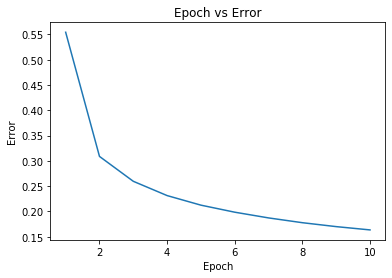

[*] Model exported successfully to handwritten_model_96.0.json


In [9]:
network.epoch_vs_error()
file_to_export = f"handwritten_model_{round(network.accuracy, 2)}.json"
network.export_model(file_to_export)

In [10]:
correct = 0
total = 0

for sample in testing :
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    if p == a :
        correct += 1
    total += 1

testing_accuracy = (correct*100)/total
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 94.79


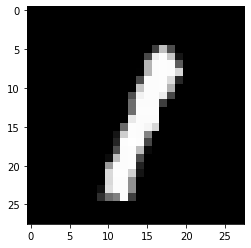

It is:  1


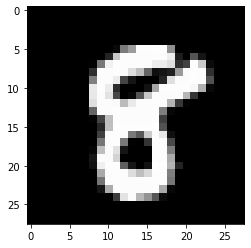

It is:  8


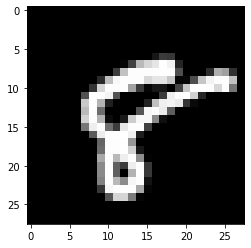

It is:  8


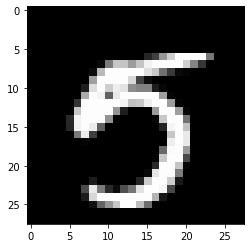

It is:  5


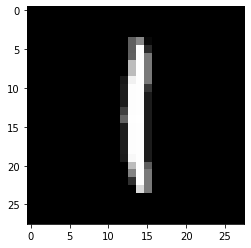

It is:  1


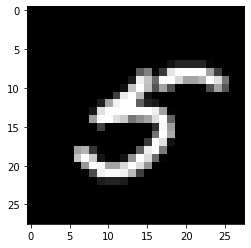

It is:  5


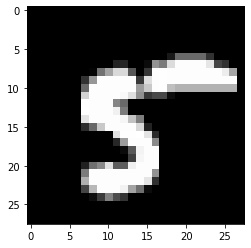

It is:  5


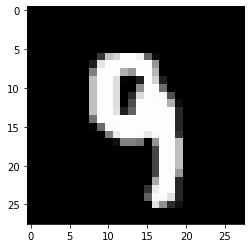

It is:  9


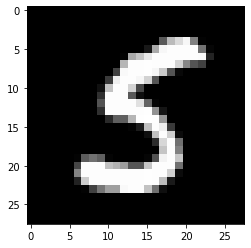

It is:  5


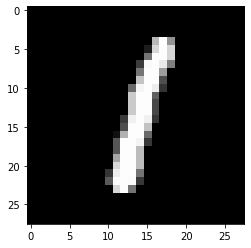

It is:  1


In [15]:
testing_size = len(testing)
for i in range(10) :
    j = random.randint(0, testing_size-1)
    sample = testing[j]
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    showImage(features)
    print(f"It is: ", p)
    